# Unsupervised Analysis of Days of Week

Treat Fremont bike bridge crossings each day as features to learn about relationships between various days in Seattle over the past several years.

In [3]:
%matplotlib inline

In [1]:
from jupyterworkflow.data import get_fremont_data

data = get_fremont_data()

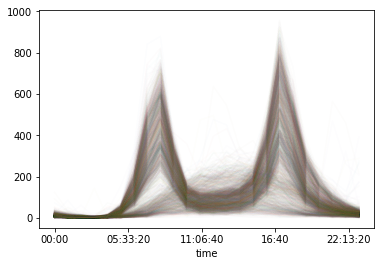

In [2]:
pivoted = data.pivot_table(
    "Total", index = data.index.time, columns=data.index.date)

pivoted.plot(legend=False, alpha=0.01)

In [4]:
import numpy as np
np.unique(data.index.time)

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0),
       datetime.time(3, 0), datetime.time(4, 0), datetime.time(5, 0),
       datetime.time(6, 0), datetime.time(7, 0), datetime.time(8, 0),
       datetime.time(9, 0), datetime.time(10, 0), datetime.time(11, 0),
       datetime.time(12, 0), datetime.time(13, 0), datetime.time(14, 0),
       datetime.time(15, 0), datetime.time(16, 0), datetime.time(17, 0),
       datetime.time(18, 0), datetime.time(19, 0), datetime.time(20, 0),
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0)],
      dtype=object)

In [6]:
assert len(np.unique(data.index.time)) == 24

# Principle Component Analysis

In [60]:
pivoted.shape

(24, 2189)

remember what this is: each row is an hour, each column is a day (hours, days)

In [61]:
pivoted.T.shape

(2189, 24)

This is now (days, hours)

Now we can treat each day as an observation consisting of 24 hours.

We can use principle component analysis (pca) to reduce the dimensionality of a dataset.

In [12]:
from sklearn.decomposition import PCA
PCA(2) # two components

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
pivoted.T

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
2012-10-03,13.0,10.0,2.0,5.0,7.0,31.0,155.0,352.0,437.0,276.0,...,128.0,164.0,315.0,583.0,380.0,128.0,80.0,63.0,49.0,17.0
2012-10-04,18.0,3.0,9.0,3.0,8.0,26.0,142.0,319.0,418.0,241.0,...,119.0,147.0,275.0,507.0,378.0,164.0,83.0,70.0,46.0,41.0
2012-10-05,11.0,8.0,7.0,4.0,9.0,25.0,105.0,319.0,370.0,212.0,...,125.0,164.0,310.0,434.0,316.0,115.0,68.0,42.0,36.0,32.0
2012-10-06,15.0,15.0,9.0,3.0,5.0,5.0,27.0,33.0,105.0,114.0,...,203.0,211.0,183.0,180.0,96.0,78.0,43.0,33.0,34.0,34.0
2012-10-07,11.0,17.0,3.0,6.0,3.0,9.0,17.0,26.0,69.0,103.0,...,241.0,231.0,225.0,191.0,113.0,49.0,55.0,47.0,18.0,16.0
2012-10-08,9.0,4.0,5.0,5.0,5.0,23.0,137.0,327.0,457.0,278.0,...,121.0,167.0,252.0,604.0,365.0,168.0,94.0,63.0,29.0,24.0
2012-10-09,12.0,3.0,4.0,8.0,9.0,31.0,153.0,368.0,462.0,275.0,...,108.0,134.0,244.0,597.0,396.0,163.0,85.0,64.0,34.0,23.0
2012-10-10,15.0,3.0,3.0,4.0,5.0,25.0,149.0,340.0,435.0,255.0,...,93.0,130.0,230.0,532.0,331.0,145.0,86.0,62.0,36.0,23.0
2012-10-11,21.0,10.0,13.0,2.0,12.0,12.0,43.0,304.0,404.0,189.0,...,108.0,143.0,270.0,517.0,299.0,149.0,104.0,71.0,48.0,33.0
2012-10-12,17.0,13.0,5.0,7.0,5.0,14.0,87.0,183.0,268.0,145.0,...,65.0,113.0,165.0,304.0,178.0,79.0,38.0,26.0,14.0,24.0


In [15]:
pivoted.T.values

array([[13., 10.,  2., ..., 63., 49., 17.],
       [18.,  3.,  9., ..., 70., 46., 41.],
       [11.,  8.,  7., ..., 42., 36., 32.],
       ...,
       [15.,  6.,  0., ..., 43., 38., 41.],
       [18., 12.,  7., ..., 35., 19., 14.],
       [ 9.,  6.,  9., ...,  7.,  9., 10.]])

In [20]:
X = pivoted.fillna(0).T.values # fills NA values with 0
X.shape

(2189, 24)

In [21]:
PCA(2).fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [24]:
X2 = PCA(2).fit_transform(X)

In [30]:
X2.shape

(2189, 2)

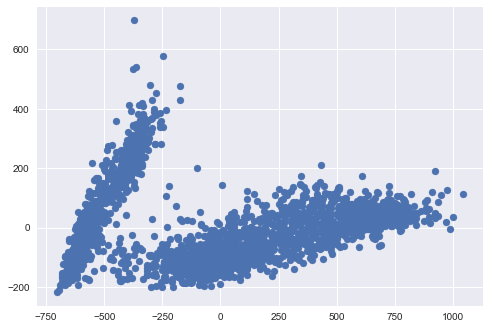

In [32]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.scatter(X2[:, 0], X2[:, 1]) # plot 2 principle components (axes don't actually mean anything)

# Perform Gaussian Mixture Analysis

In [35]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2) # Two clusters
gmm.fit(X)
gmm.predict(X) # predicts which model (cluster) each data pt will be in (0th cluster vs 1st cluster)

array([1, 1, 1, ..., 1, 0, 0])

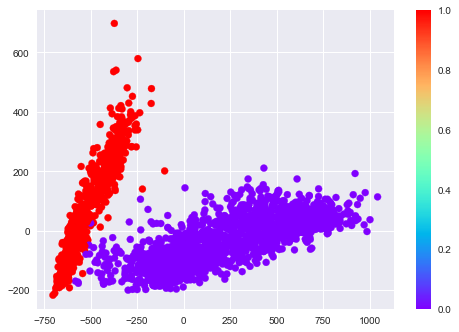

In [38]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2)
gmm.fit(X)
labels = gmm.predict(X) # mask
plt.scatter(X2[:, 0], X2[:, 1], c = labels, cmap="rainbow")
plt.colorbar()

In [39]:
# what do these clusters mean in real-data-space?

In [40]:
pivoted.shape

(24, 2189)

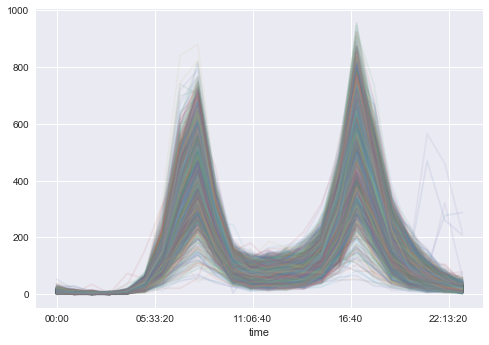

In [41]:
pivoted.T[labels == 0].T.plot(legend = False, alpha = 0.1)
# taking only the pts where the label is 0
# tranposing back to original shape
# plot like we did before, but will only be one cluster

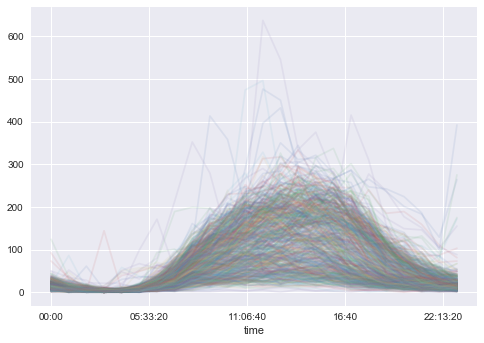

In [42]:
pivoted.T[labels == 1].T.plot(legend = False, alpha = 0.1)

Now can we see if there is a correspondence betwen these clusters & days of the week?

In [44]:
pivoted.columns

Index([2012-10-03, 2012-10-04, 2012-10-05, 2012-10-06, 2012-10-07, 2012-10-08,
       2012-10-09, 2012-10-10, 2012-10-11, 2012-10-12,
       ...
       2018-09-21, 2018-09-22, 2018-09-23, 2018-09-24, 2018-09-25, 2018-09-26,
       2018-09-27, 2018-09-28, 2018-09-29, 2018-09-30],
      dtype='object', length=2189)

In [47]:
import pandas as pd

pd.DatetimeIndex(pivoted.columns)

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-06',
               '2012-10-07', '2012-10-08', '2012-10-09', '2012-10-10',
               '2012-10-11', '2012-10-12',
               ...
               '2018-09-21', '2018-09-22', '2018-09-23', '2018-09-24',
               '2018-09-25', '2018-09-26', '2018-09-27', '2018-09-28',
               '2018-09-29', '2018-09-30'],
              dtype='datetime64[ns]', length=2189, freq=None)

In [48]:
pd.DatetimeIndex(pivoted.columns).dayofweek
# get day of week (using pandas, pandas is great!)

Int64Index([2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
            ...
            4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
           dtype='int64', length=2189)

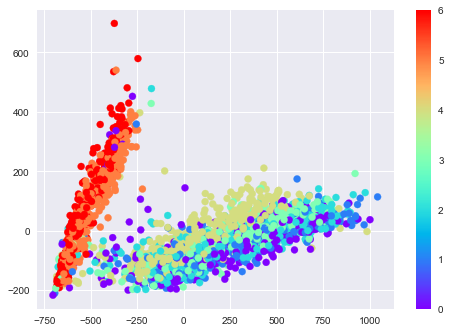

In [50]:
daysofweek = pd.DatetimeIndex(pivoted.columns).dayofweek
plt.scatter(X2[:, 0], X2[:, 1], c = daysofweek, cmap="rainbow")
plt.colorbar()

Our hypothesis that is was weekends vs. weekdays was correct! but there are some weekday outliers
Cluster 0 = weekday
Cluster 1 = weekend

In [57]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (daysofweek < 5)] # get the days in weekend cluster but are weekdays

DatetimeIndex(['2012-11-22', '2012-11-23', '2012-12-24', '2012-12-25',
               '2013-01-01', '2013-05-27', '2013-07-04', '2013-07-05',
               '2013-09-02', '2013-11-28', '2013-11-29', '2013-12-20',
               '2013-12-24', '2013-12-25', '2014-01-01', '2014-04-23',
               '2014-05-26', '2014-07-04', '2014-09-01', '2014-11-27',
               '2014-11-28', '2014-12-24', '2014-12-25', '2014-12-26',
               '2015-01-01', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-11-26', '2015-11-27', '2015-12-24', '2015-12-25',
               '2016-01-01', '2016-05-30', '2016-07-04', '2016-09-05',
               '2016-11-24', '2016-11-25', '2016-12-26', '2017-01-02',
               '2017-02-06', '2017-05-29', '2017-07-04', '2017-09-04',
               '2017-11-23', '2017-11-24', '2017-12-25', '2017-12-26',
               '2018-01-01', '2018-05-28', '2018-07-04', '2018-09-03'],
              dtype='datetime64[ns]', freq=None)

Most of these make sense, like Thanksgiving, Christmas, Memorial Day, etc.

What's the deal with Feb 6 2017? snow day in Seattle! (google it)

# Some quick formatting things:
Here's some LaTeX, $x=e^y$.

Here's some code:
```
git clone blah blah
```

Subplots:

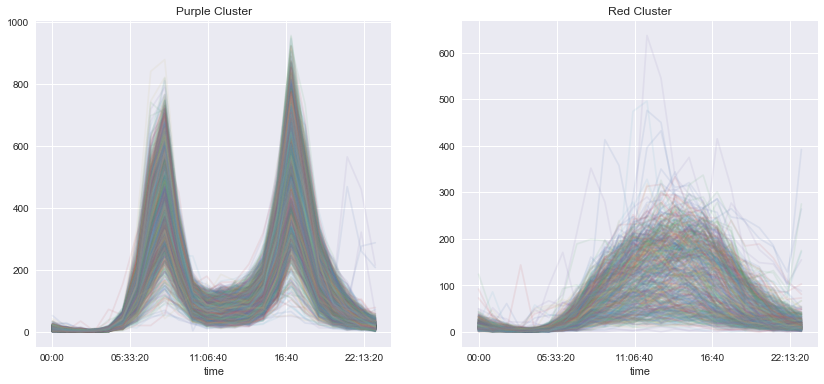

In [64]:
fig, ax = plt.subplots(1, 2, figsize = (14,6))

pivoted.T[labels==0].T.plot(legend = False, alpha = 0.1, ax=ax[0])
pivoted.T[labels==1].T.plot(legend = False, alpha = 0.1, ax=ax[1])

ax[0].set_title("Purple Cluster");
ax[1].set_title("Red Cluster");

Helpful libraries: (see others in Etherpad)

sklearn, skimage for machine learning & image recognition

link to the Etherpad in case you lose it: https://pad.carpentries.org/2018-10-08-IACS

git config --global alias.st status # would make a shortcut for git status as git st